In [1]:
from dotenv import load_dotenv
import os
from langchain_groq import  ChatGroq

In [2]:
load_dotenv()
groq_api_key = os.getenv("groq_KEY")
langsmith_api_key = os.getenv("LANGSMITH_API_KEY")

os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHANIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"


llm = ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")

## Start Building Chatbot Using Langgraph

In [3]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [5]:
def chatbot(state:State):
    return {"messages": llm.invoke(state['messages'])}

In [6]:
graph_builder.add_node("chatbot",chatbot)

In [7]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [8]:
graph=graph_builder.compile()

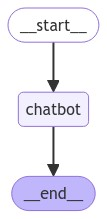

In [9]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [10]:
while True:        
    user_input = input("User :")
    if user_input.lower() in ['quit','q']:
        print("Good Bye")
        break
    for event in graph.stream({'messages': ("user",user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assistant:", value["messages"].content)

dict_values([{'messages': AIMessage(content='为\n\n\n\n\n\n\n\n\n\n\n\n\nwe\n\n\n\n\n\n\n\n\nwewewe\n\n\n\nwe\n\n\n\n\n\n为\n\n为we\n\n\nwe\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n,\n\n\n\n\n\n\n\n\n\n为xFFFFFFwewe\nwe\n\n\n\n\n\n\n\n\n\n为\n\n\n\n\n<we&\n\n\nwe\n\n\n\n\n\n\n\n\n\n\n<\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n为\n\n\n\n\nwe\nme\n\n\n\nwe\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nwe\n\n\nwewe\n\n\n\n\n\n\n\n\n为\n\n\n\n\n\n\n\n\nwe\n\n\nwe\n\n\n\n\n\nwe\n\n\n\n\n\n\n\n\n', response_metadata={'token_usage': {'completion_tokens': 172, 'prompt_tokens': 9, 'total_tokens': 181, 'completion_time': 0.312727273, 'prompt_time': 3.4e-07, 'queue_time': 0.013604569, 'total_time': 0.312727613}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-68811bd1-5580-468e-a522-04b88e343e13-0', usage_metadata={'input_tokens': 9, 'output_tokens': 172, 'total_tokens': 181})}])
content='为\n\n\n\n\n\n\n\n\n\n\n\n\nwe\n\n\n\n\n\n\n\n\nwewewe\n\n\n\nwe\n\n\n\n\n\